# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [3]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título

df["title_length"] = df["title"].apply(len)

In [4]:
# Calcula media, mediana y moda de la columna 'title_length'

media = df["title_length"].mean()
mediana = df["title_length"].median()
moda = mode(df["title_length"]).mode.item()

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 15.48
Mediana: 14.0
Moda: 12


In [5]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'

rango = df["title_length"].max() - df["title_length"].min()
varianza = df["title_length"].var()
desviacion_estandar = df["title_length"].std()

print(f"Rango: {rango}")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {desviacion_estandar:.2f}")

Rango: 67
Varianza: 72.11
Desviación estándar: 8.49


In [6]:
# Calcula asimetría y curtosis de la columna 'title_length'

asimetria = skew(df["title_length"])
curtosis_valor = kurtosis(df["title_length"])

print(f"Asimetría: {asimetria:.2f}")
print(f"Curtosis: {curtosis_valor:.2f}")

Asimetría: 1.52
Curtosis: 3.79


In [7]:
# Imprime el título más corto y el título más largo según su longitud

titulo_mas_corto = df.loc[df["title_length"].idxmin(), "title"]
titulo_mas_largo = df.loc[df["title_length"].idxmax(), "title"]

print(f"Título más corto: {titulo_mas_corto}")
print(f"Título más largo: {titulo_mas_largo}")

Título más corto: M
Título más largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


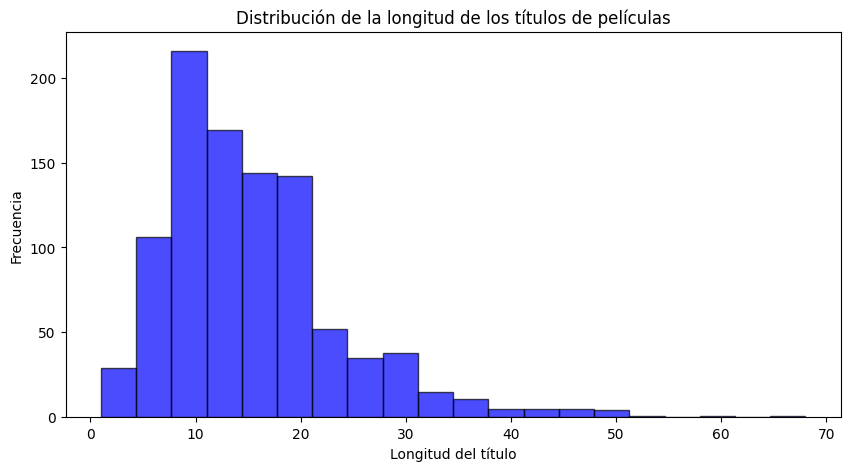

In [8]:
# grafica tus resultados

# Histograma de la distribución de la longitud de los títulos
plt.figure(figsize=(10, 5))
plt.hist(df["title_length"], bins=20, color="blue", edgecolor="black", alpha=0.7)

# Etiquetas y título
plt.xlabel("Longitud del título")
plt.ylabel("Frecuencia")
plt.title("Distribución de la longitud de los títulos de películas")

# Mostrar la gráfica
plt.show()


---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [ ]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

title_lengths = [10, 13, 14, 18, 22]
print(f"Lista de valores: {title_lengths}")


Lista de valores: [10, 13, 14, 18, 22]


In [12]:
# Calcula la media de los 5 valores

media = np.mean(title_lengths)
print(f"Media: {media:.2f}")

Media: 15.40


In [13]:
# Calcula las diferencias al cuadrado con respecto a la media

diferencias_cuadrado = [(x - media) ** 2 for x in title_lengths]
print(f"Diferencias al cuadrado con respecto a la media: {diferencias_cuadrado}")

Diferencias al cuadrado con respecto a la media: [np.float64(29.160000000000004), np.float64(5.760000000000002), np.float64(1.960000000000001), np.float64(6.759999999999998), np.float64(43.559999999999995)]


In [14]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

varianza = np.mean(diferencias_cuadrado)
desviacion_estandar = np.sqrt(varianza)
print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {desviacion_estandar:.2f}")

Varianza: 17.44
Desviación estándar: 4.18
